In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# Load GeoJSON file with Philadelphia zip code boundaries
zipcodes = gpd.read_file('/Users/amatutuwaaosei-akoto/Desktop/choropleth_maps/Zipcodes_Poly.geojson')
print(zipcodes.head())

   OBJECTID   CODE  COD   Shape__Area  Shape__Length  \
0         1  19120   20  9.177970e+07   49921.544063   
1         2  19121   21  6.959879e+07   39534.887217   
2         3  19122   22  3.591632e+07   24124.645221   
3         4  19123   23  3.585175e+07   26421.728982   
4         5  19124   24  1.448080e+08   63658.770420   

                                            geometry  
0  POLYGON ((-75.11107 40.04682, -75.10943 40.045...  
1  POLYGON ((-75.19227 39.99463, -75.19205 39.994...  
2  POLYGON ((-75.15406 39.98601, -75.15328 39.985...  
3  POLYGON ((-75.15190 39.97056, -75.15150 39.970...  
4  POLYGON ((-75.09660 40.04249, -75.09281 40.039...  


In [16]:
# Load CSV file with number of deaths by zip code for 2019, 2020, and 2021
deaths = pd.read_csv('/Users/amatutuwaaosei-akoto/Desktop/choropleth_maps/Number of overdoses by incident location 2019-2020 -2021.csv')
print(deaths.head())

   Zip Code 2019 Number of Deaths 2020 Number of Deaths 2021 Number of Deaths
0     19102                  6-24            Suppressed            Suppressed
1     19103            Suppressed                  6-24                  6-24
2     19104                  6-24                 25-49                  6-24
3     19106            Suppressed                  6-24                  6-24
4     19107                  6-24                  6-24                  6-24


In [25]:
# Replace 'suppressed' with 'null' in the death count columns
for col in ['2019 Number of Deaths', '2020 Number of Deaths', '2021 Number of Deaths']:
    deaths.loc[deaths[col] == 'suppressed', col] = 'null'

In [26]:
merged_data = zipcodes.merge(deaths, left_on='CODE', right_on='Zip Code')

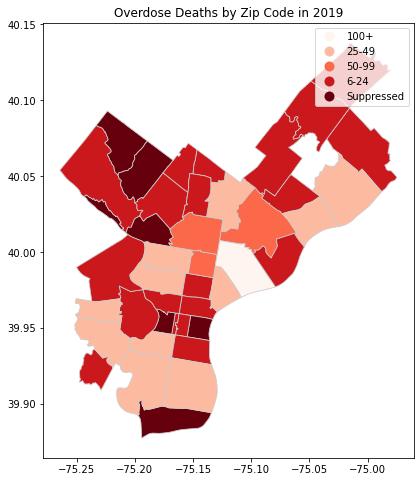

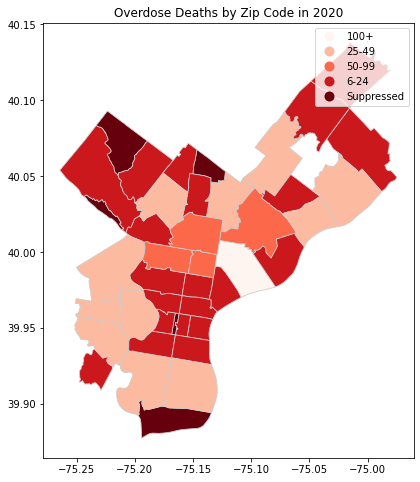

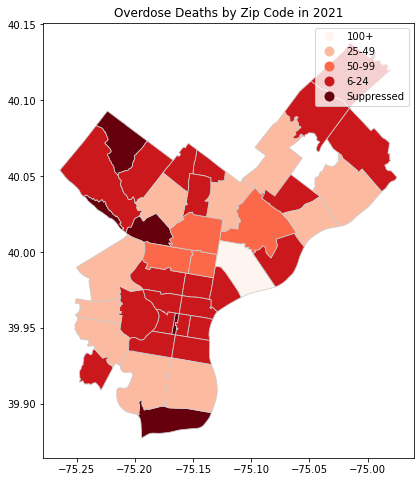

In [22]:
for year in ['2019 Number of Deaths', '2020 Number of Deaths', '2021 Number of Deaths']:
    # Create the choropleth map
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')
    ax.set_title('Overdose Deaths by Zip Code in {}'.format(year[:4]))
    merged_data.plot(column=year, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.show()

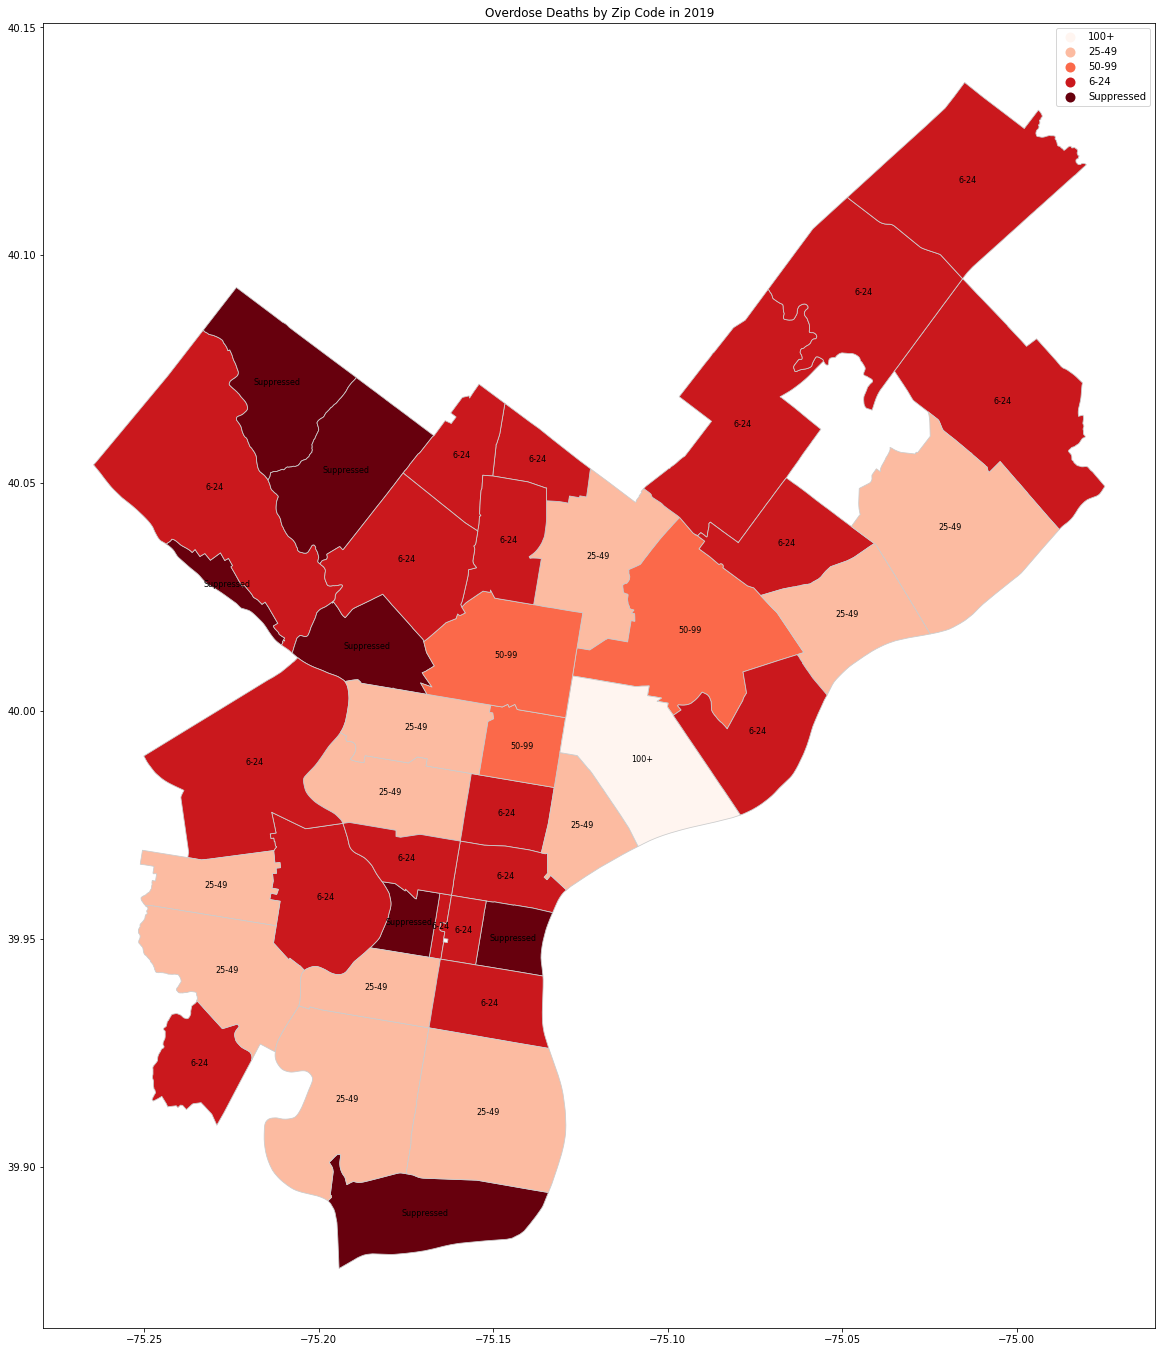

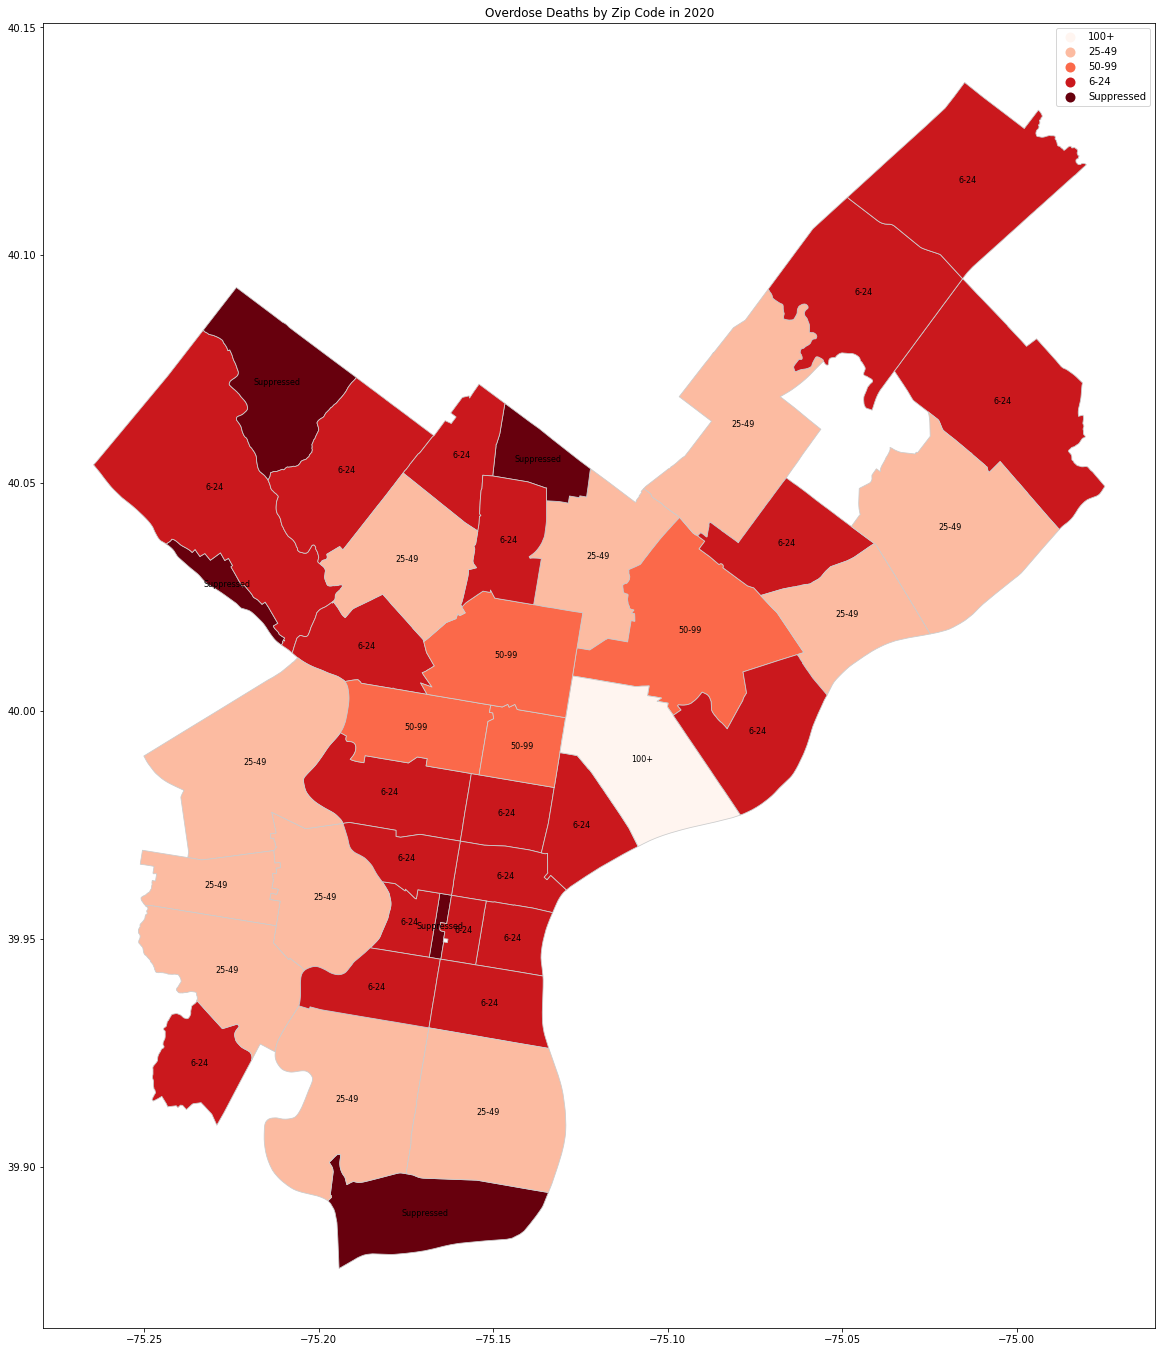

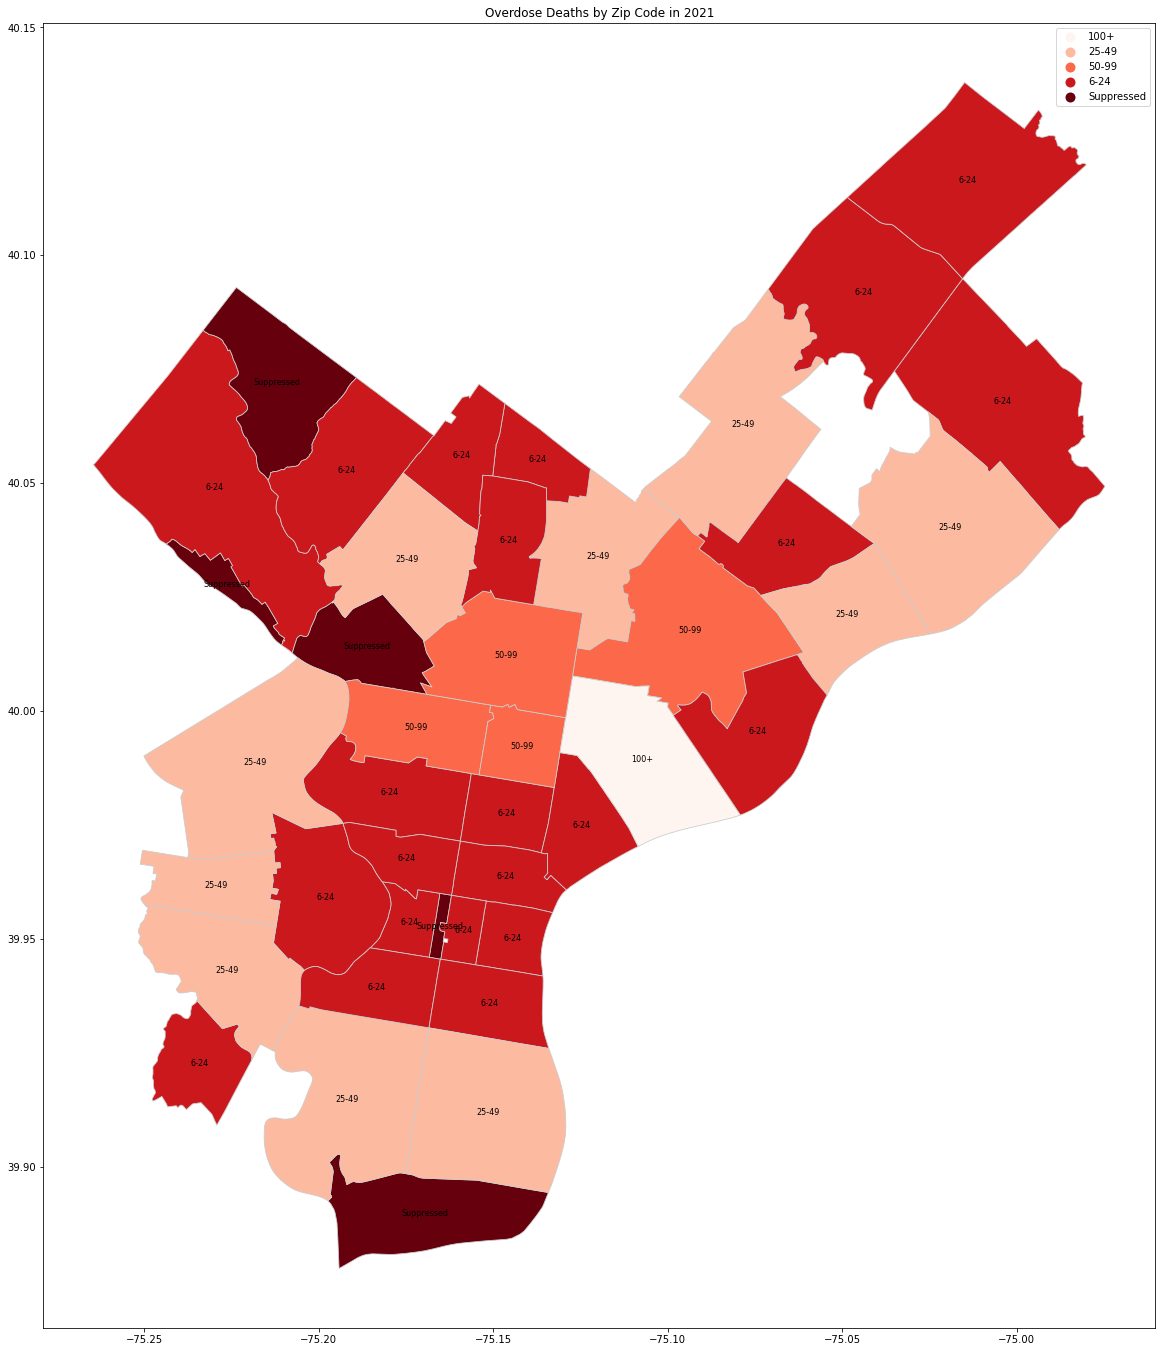

In [28]:
# Create three separate maps, one for each year
for year in ['2019 Number of Deaths', '2020 Number of Deaths', '2021 Number of Deaths']:
    # Create the choropleth map
    fig, ax = plt.subplots(figsize=(36, 24))
    ax.set_aspect('equal')
    ax.set_title('Overdose Deaths by Zip Code in {}'.format(year[:4]))
    merged_data.plot(column=year, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    # Add annotations for each zip code
    for idx, row in merged_data.iterrows():
        if row[year] != 'null':
            plt.annotate(text=row[year], xy=row['geometry'].centroid.coords[0], ha='center', va='center', fontsize=8)
    
    plt.show()